# Прогноз эффективности стартапов


**Задача проекта:** Средствами ML составить прогноз закроется ли стартап.В ходе анализа необходимо решить задачу бинарной классификации

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт библиотек</a></span></li></ul></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span><ul class="toc-item"><li><span><a href="#Тренировочные-данные" data-toc-modified-id="Тренировочные-данные-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Тренировочные данные</a></span></li><li><span><a href="#Тестовые-данные" data-toc-modified-id="Тестовые-данные-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тестовые данные</a></span></li><li><span><a href="#Сравнение-данных" data-toc-modified-id="Сравнение-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сравнение данных</a></span></li></ul></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ признаков</a></span><ul class="toc-item"><li><span><a href="#Анализ-количественных-признаков-df_train" data-toc-modified-id="Анализ-количественных-признаков-df_train-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Анализ количественных признаков <code>df_train</code></a></span><ul class="toc-item"><li><span><a href="#Оценим-распределение-признаков-в-зависимости-от-целевого-признака" data-toc-modified-id="Оценим-распределение-признаков-в-зависимости-от-целевого-признака-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Оценим распределение признаков в зависимости от целевого признака</a></span></li></ul></li><li><span><a href="#Анализ-количественных-признаков-df_test" data-toc-modified-id="Анализ-количественных-признаков-df_test-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Анализ количественных признаков <code>df_test</code></a></span><ul class="toc-item"><li><span><a href="#Сравним-распределение-тренировочных-и-тестовых-данных" data-toc-modified-id="Сравним-распределение-тренировочных-и-тестовых-данных-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Сравним распределение тренировочных и тестовых данных</a></span></li></ul></li></ul></li><li><span><a href="#Добавление-признаков" data-toc-modified-id="Добавление-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Добавление признаков</a></span><ul class="toc-item"><li><span><a href="#Тренировочная-выборка" data-toc-modified-id="Тренировочная-выборка-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Тренировочная выборка</a></span></li><li><span><a href="#Тестовая-выборка" data-toc-modified-id="Тестовая-выборка-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Тестовая выборка</a></span></li><li><span><a href="#Оценим-Корреляцию-признаков" data-toc-modified-id="Оценим-Корреляцию-признаков-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Оценим Корреляцию признаков</a></span></li></ul></li><li><span><a href="#Создание-пайплайна" data-toc-modified-id="Создание-пайплайна-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Создание пайплайна</a></span><ul class="toc-item"><li><span><a href="#Работа-модели-на-тестовых-данных" data-toc-modified-id="Работа-модели-на-тестовых-данных-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Работа модели на тестовых данных</a></span></li></ul></li></ul></div>

## Загрузка данных


### Импорт библиотек

In [1]:
#!pip install shap -q
#!pip install phik -q
#!pip install mlxtend -q

In [2]:
# импорт библиотек

import warnings

import pandas as pd
pd.options.display.expand_frame_repr = False
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

from scipy.stats import ttest_ind
from phik import report
from phik.report import plot_correlation_matrix

# Ignore UserWarnings from _encoders.py
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
# category=UserWarning, module='sklearn.preprocessing._encoders')


from sklearn.inspection import permutation_importance 

# загружаем метрики
from sklearn.metrics import f1_score, precision_recall_curve 

# загружаем класс pipeline
from sklearn.pipeline import Pipeline

# загружаем классы для подготовки данных
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# загружаем класс для работы с пропусками 
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# загружаем нужные модели
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score 
from sklearn.linear_model import LogisticRegression 

In [3]:
# импорт входных данных
try:
    df_train = pd.read_csv('/kaggle/input/kaggle-startups/kaggle_startups_train_28062024.csv')
    df_test = pd.read_csv('/kaggle/input/kaggle-startups/kaggle_startups_test_28062024.csv')
    sample_submit = pd.read_csv('/kaggle/input/kaggle-startups/kaggle_startups_sample_submit_28062024.csv')
except:
    df_train = pd.read_csv(r'C:\Users\vorotintsev\Desktop\Обучалки\Data_Science\yandex-praktikum-projects\Мастерская\M1_DS - Startups (STD)\kaggle_startups_train_28062024.csv')
    df_test = pd.read_csv(r'C:\Users\vorotintsev\Desktop\Обучалки\Data_Science\yandex-praktikum-projects\Мастерская\M1_DS - Startups (STD)\kaggle_startups_test_28062024.csv')
    sample_submit = pd.read_csv(r'C:\Users\vorotintsev\Desktop\Обучалки\Data_Science\yandex-praktikum-projects\Мастерская\M1_DS - Startups (STD)\kaggle_startups_sample_submit_28062024.csv')

## Обзор данных

### Тренировочные данные

In [4]:
df_train.sample(10)

name                                 category_list  funding_total_usd     status country_code state_code         region         city  funding_rounds  founded_at first_funding_at last_funding_at closed_at
30897           AC Holdco     Business Services|Debt Collecting|Finance       252794435.00  operating          USA         IL        Chicago       Itasca               3  2007-05-22       2009-04-15      2009-12-08       NaN
16514              Wunwun                                    E-Commerce        17500000.00  operating          USA         NY  New York City     New York               2  2013-09-01       2014-01-01      2014-02-18       NaN
50388  Real Estate Direct                           Enterprise Software         1446466.00  operating          NaN        NaN            NaN          NaN               1  2009-11-03       2014-04-29      2014-04-29       NaN
12556           8thBridge                    E-Commerce|Social Commerce        15590000.00  operating          USA         MN    Minneapolis  Minneapolis               3  2008-11-01       2009-11-16      2011-03-21       NaN
29252     eHealth Systems                           Health and Wellness           40000.00  operating          CHL         12       Santiago     Santiago               1  2010-01-01       2012-06-04      2012-06-04       NaN
44272             iSuppli  Business Analytics|Consulting|Product Design        30442772.00  operating          USA         CA    Los Angeles   El Segundo               4  1999-12-27       2001-11-14      2010-06-08       NaN
36259               Yallo                                   Apps|Mobile         6300000.00  operating          ISR        NaN            NaN          NaN               2  2012-06-01       2015-03-10      2015-11-12       NaN
28417  CEON Solutions Pvt                                     Education          688000.00  operating          IND         16    IND - Other     Nasrapur               1  2004-01-01       2007-03-20      2007-03-20       NaN
19546           BrainMass                                     Education          469542.00  operating          CAN         ON        Toronto    Newmarket               1  2002-01-01       2002-01-01      2002-01-01       NaN
29479            Golfdigg                                          Apps          700000.00  operating          THA         40        Bangkok      Bangkok               1  2013-09-01       2015-10-12      2015-10-12       NaN

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               52515 non-null  object 
 1   category_list      50051 non-null  object 
 2   funding_total_usd  42447 non-null  float64
 3   status             52516 non-null  object 
 4   country_code       47014 non-null  object 
 5   state_code         45753 non-null  object 
 6   region             46157 non-null  object 
 7   city               46157 non-null  object 
 8   funding_rounds     52516 non-null  int64  
 9   founded_at         52516 non-null  object 
 10  first_funding_at   52516 non-null  object 
 11  last_funding_at    52516 non-null  object 
 12  closed_at          4917 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 5.2+ MB


Необходимо изменить тип данных в столбцах:
 - `founded_at`
 - `first_funding_at`
 - `last_funding_at`
 - `closed_at`
Так же имеется большое количество пропусков.


In [6]:
df_train['founded_at'] = pd.to_datetime(df_train['founded_at'])
df_train['first_funding_at'] = pd.to_datetime(df_train['first_funding_at'])
df_train['last_funding_at'] = pd.to_datetime(df_train['last_funding_at'])
df_train['closed_at'] = pd.to_datetime(df_train['closed_at'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [7]:
df_train.drop_duplicates(inplace=True)

In [8]:
df_train.isna().sum()

name                     1
category_list         2465
funding_total_usd    10069
status                   0
country_code          5502
state_code            6763
region                6359
city                  6359
funding_rounds           0
founded_at               0
first_funding_at         0
last_funding_at          0
closed_at            47599
dtype: int64

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               52515 non-null  object        
 1   category_list      50051 non-null  object        
 2   funding_total_usd  42447 non-null  float64       
 3   status             52516 non-null  object        
 4   country_code       47014 non-null  object        
 5   state_code         45753 non-null  object        
 6   region             46157 non-null  object        
 7   city               46157 non-null  object        
 8   funding_rounds     52516 non-null  int64         
 9   founded_at         52516 non-null  datetime64[ns]
 10  first_funding_at   52516 non-null  datetime64[ns]
 11  last_funding_at    52516 non-null  datetime64[ns]
 12  closed_at          4917 non-null   datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(1), object(7)
memory 

In [10]:
df_train.describe()

funding_total_usd  funding_rounds                     founded_at               first_funding_at                last_funding_at                      closed_at
count           42447.00        52516.00                          52516                          52516                          52516                           4917
mean         18247480.66            1.74  2008-11-04 09:44:16.196206848  2011-07-17 04:45:33.247010304  2012-06-27 16:29:42.313961472  2012-01-16 16:14:21.012812544
min                 1.00            1.00            1970-02-05 00:00:00            1977-05-15 00:00:00            1977-05-15 00:00:00            1983-10-06 00:00:00
25%            336027.50            1.00            2006-10-01 00:00:00            2009-10-12 00:00:00            2011-02-01 00:00:00            2009-09-18 00:00:00
50%           2000000.00            1.00            2010-10-01 00:00:00            2012-07-23 00:00:00            2013-08-30 00:00:00            2012-09-15 00:00:00
75%          10000000.00            2.00            2013-01-01 00:00:00            2014-04-01 00:00:00            2014-11-17 00:00:00            2015-04-23 00:00:00
max       30079503000.00           19.00            2016-04-02 00:00:00            2015-12-05 00:00:00            2015-12-07 00:00:00            2017-10-21 00:00:00
std         187117301.32            1.37                            NaN                            NaN                            NaN                            NaN

In [11]:
df_train.describe(include='object')

name category_list     status country_code state_code       region           city
count       52515         50051      52516        47014      45753        46157          46157
unique      52515         22105          2          134        300         1036           4477
top     Lunchgate      Software  operating          USA         CA  SF Bay Area  San Francisco
freq            1          3207      47599        29702      10219         6970           2824

Заменим пустые значения на маркерные `unknown`

In [12]:
condition = df_train[['country_code', 'state_code', 'region', 'city']].isna().any(axis=1)
df_train.loc[condition, ['country_code', 'state_code', 'region', 'city']] = 'unknown'

Вычислим время жизни компаний в годах, для этого дополним значения в столбце `closed_at` значениями даты извлечения данных: `'2025-03-01'`

Для расчета количества лет будет использовать столбец `lifetime_years`, для этого разделим значения нового столбца `lifetime`, на 365.25, для учета високосных лет:

$\frac{365\cdot{3}+366\cdot{1}}{4} = 365.25$

In [13]:
# Добавим время жизни компании в тренировочный датафрейм. 

# Заполняем NaN датой извлечения данных
df_train['closed_at'].fillna(pd.to_datetime('2018-01-01'), inplace=True) 

# Вычислим время жизни компании, путем вычитания из даты закрытия даты основания компании, 
# с переводом типа object в datetime, а результат трансформируем в дни

df_train['lifetime'] = (
    abs(df_train.closed_at.astype("datetime64[ns]")-df_train.founded_at.astype("datetime64[ns]"))).dt.days
df_train['lifetime_years'] = df_train['lifetime']/365.25
df_train.describe()

funding_total_usd  funding_rounds                     founded_at               first_funding_at                last_funding_at                      closed_at  lifetime  lifetime_years
count           42447.00        52516.00                          52516                          52516                          52516                          52516  52516.00        52516.00
mean         18247480.66            1.74  2008-11-04 09:44:16.196206848  2011-07-17 04:45:33.247010304  2012-06-27 16:29:42.313961472  2017-06-11 05:36:46.504684032   3140.83            8.60
min                 1.00            1.00            1970-02-05 00:00:00            1977-05-15 00:00:00            1977-05-15 00:00:00            1983-10-06 00:00:00     19.00            0.05
25%            336027.50            1.00            2006-10-01 00:00:00            2009-10-12 00:00:00            2011-02-01 00:00:00            2018-01-01 00:00:00   1739.00            4.76
50%           2000000.00            1.00            2010-10-01 00:00:00            2012-07-23 00:00:00            2013-08-30 00:00:00            2018-01-01 00:00:00   2557.00            7.00
75%          10000000.00            2.00            2013-01-01 00:00:00            2014-04-01 00:00:00            2014-11-17 00:00:00            2018-01-01 00:00:00   4018.00           11.00
max       30079503000.00           19.00            2016-04-02 00:00:00            2015-12-05 00:00:00            2015-12-07 00:00:00            2018-01-01 00:00:00  17378.00           47.58
std         187117301.32            1.37                            NaN                            NaN                            NaN                            NaN   2147.82            5.88

Для удобства приведем значения столбца `funding_total_usd` в логарифмический масштаб

In [14]:
#df_train['funding_total_usd'].fillna(0, inplace=True) 
df_train['log_funding_total_usd'] = np.log1p(df_train['funding_total_usd'])

In [15]:
# Заполним пустые значения признака funding_total_usd средними значениями в зависимости от величины funding_rounds 
# Найдем среднее значение в зависимости от величины funding_rounds 
mean_values = df_train.groupby('funding_rounds')['funding_total_usd'].mean()

# Заполним NaN в столбце funding_total_usd соотвествующими средними значениями
df_train['funding_total_usd'] = df_train.apply(
    lambda row: mean_values[row['funding_rounds']] if pd.isna(row['funding_total_usd']) else row['funding_total_usd'],
    axis=1
)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52516 entries, 0 to 52515
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   52515 non-null  object        
 1   category_list          50051 non-null  object        
 2   funding_total_usd      52516 non-null  float64       
 3   status                 52516 non-null  object        
 4   country_code           52516 non-null  object        
 5   state_code             52516 non-null  object        
 6   region                 52516 non-null  object        
 7   city                   52516 non-null  object        
 8   funding_rounds         52516 non-null  int64         
 9   founded_at             52516 non-null  datetime64[ns]
 10  first_funding_at       52516 non-null  datetime64[ns]
 11  last_funding_at        52516 non-null  datetime64[ns]
 12  closed_at              52516 non-null  datetime64[ns]
 13  l

In [16]:
df_train.describe()

funding_total_usd  funding_rounds                     founded_at               first_funding_at                last_funding_at                      closed_at  lifetime  lifetime_years  log_funding_total_usd
count           52516.00        52516.00                          52516                          52516                          52516                          52516  52516.00        52516.00               42447.00
mean         16665301.17            1.74  2008-11-04 09:44:16.196206848  2011-07-17 04:45:33.247010304  2012-06-27 16:29:42.313961472  2017-06-11 05:36:46.504684032   3140.83            8.60                  14.37
min                 1.00            1.00            1970-02-05 00:00:00            1977-05-15 00:00:00            1977-05-15 00:00:00            1983-10-06 00:00:00     19.00            0.05                   0.69
25%            529721.25            1.00            2006-10-01 00:00:00            2009-10-12 00:00:00            2011-02-01 00:00:00            2018-01-01 00:00:00   1739.00            4.76                  12.72
50%           4246578.50            1.00            2010-10-01 00:00:00            2012-07-23 00:00:00            2013-08-30 00:00:00            2018-01-01 00:00:00   2557.00            7.00                  14.51
75%           9302247.03            2.00            2013-01-01 00:00:00            2014-04-01 00:00:00            2014-11-17 00:00:00            2018-01-01 00:00:00   4018.00           11.00                  16.12
max       30079503000.00           19.00            2016-04-02 00:00:00            2015-12-05 00:00:00            2015-12-07 00:00:00            2018-01-01 00:00:00  17378.00           47.58                  24.13
std         168266746.16            1.37                            NaN                            NaN                            NaN                            NaN   2147.82            5.88                   2.40

Оценим категории в столбце `category_list`

In [17]:
df_train['categories_number'] = df_train['category_list'].apply(
                lambda x: x.count('|') + 1 if isinstance(x, str) else 0)
df_train.sample(10)

name                                      category_list  funding_total_usd     status country_code state_code                 region           city  funding_rounds founded_at first_funding_at last_funding_at  closed_at  lifetime  lifetime_years  log_funding_total_usd  categories_number
37041  Harbour Networks Holdings                                        Web Hosting        37000000.00  operating          CHN         22                Beijing        Beijing               1 2000-01-01       2005-03-03      2005-03-03 2018-01-01      6575           18.00                  17.43                  1
23792                    Zoeticx                                            Medical          580000.00  operating          USA         CA            SF Bay Area       San Jose               1 2011-01-01       2012-03-26      2012-03-26 2018-01-01      2557            7.00                  13.27                  1
46529   Stadion Money Management                                            Finance         9302247.03  operating          USA         GA        Athens, Georgia   Watkinsville               1 2010-01-10       2011-07-13      2011-07-13 2018-01-01      2913            7.98                    NaN                  1
8294                    Zolertia  Communications Hardware|Embedded Hardware and ...          322689.00  operating          ESP         56              Barcelona      Barcelona               2 2003-10-13       2015-04-09      2015-04-09 2018-01-01      5194           14.22                  12.68                  4
32739                CellCentric                                      Biotechnology         6515581.00  operating          GBR         C3                 London      Cambridge               1 2003-01-01       2013-06-25      2013-06-25 2018-01-01      5479           15.00                  15.69                  1
46697                   Recochem                 Chemicals|Customer Service|Trading         9302247.03  operating          CAN         QC               Montreal       Montréal               1 2012-10-27       2014-05-05      2014-05-05 2018-01-01      1892            5.18                    NaN                  3
47821                   PrintEco                                           Software          325006.00  operating          USA         IL  Springfield, Illinois      Champaign               4 2010-01-01       2010-08-25      2013-09-20 2018-01-01      2922            8.00                  12.69                  1
4138                Software.com                                                NaN         9302247.03     closed      unknown    unknown                unknown        unknown               1 2014-01-01       2014-01-01      2014-01-01 2015-07-31       576            1.58                    NaN                  0
5132      Allied Payment Network                                            Finance         1458786.00  operating          USA         IN             Fort Wayne     Fort Wayne               3 2010-01-01       2013-02-11      2014-01-09 2018-01-01      2922            8.00                  14.19                  1
9836                      Groove                                                CRM           28000.00  operating          USA         CA            SF Bay Area  Mountain View               1 2013-01-01       2014-02-10      2014-02-10 2018-01-01      1826            5.00                  10.24                  1

In [18]:
df_train.sample(10)

name                                      category_list  funding_total_usd     status country_code state_code         region               city  funding_rounds founded_at first_funding_at last_funding_at  closed_at  lifetime  lifetime_years  log_funding_total_usd  categories_number
50066            Ocho Global                                     Gambling|Games         1945000.00  operating          USA         IL     IL - Other       Edwardsville               1 2011-01-01       2012-08-06      2012-08-06 2018-01-01      2557            7.00                  14.48                  2
41943                  Olist    Marketplaces|Retail|Small and Medium Businesses          835000.00  operating      unknown    unknown        unknown            unknown               1 2015-02-01       2015-04-01      2015-04-01 2018-01-01      1065            2.92                  13.64                  3
27648  Fab Solutions Company              Semiconductor Manufacturing Equipment         1600000.00  operating          JPN         19    JPN - Other         Takatsu-ku               1 2002-01-01       2002-10-11      2002-10-11 2018-01-01      5844           16.00                  14.29                  1
11303                  Zoomy                                             Travel         9302247.03  operating          NZL         E7       Auckland           Auckland               1 2013-01-01       2014-01-23      2014-01-23 2018-01-01      1826            5.00                    NaN                  1
22374            CDL Warrior  Information Technology|Logistics|Mobile Softwa...           45000.00  operating          USA         PA     Pittsburgh         Pittsburgh               3 2014-01-01       2014-01-01      2015-06-09 2018-01-01      1461            4.00                  10.71                  3
24662             BDS Mobile  Application Platforms|Brand Marketing|Communic...         1000000.00  operating          USA         WI        Madison            Madison               1 2011-10-06       2014-09-11      2014-09-11 2018-01-01      2279            6.24                  13.82                  6
7984                  ZeeMee                            Apps|Education|Internet         6800000.00  operating          USA         CA    SF Bay Area      Mountain View               2 2014-01-01       2014-12-01      2015-10-01 2018-01-01      1461            4.00                  15.73                  3
37875              Greystone                                            Finance        60500000.00  operating          USA         NY  New York City           New York               1 1988-01-01       2014-02-18      2014-02-18 2018-01-01     10958           30.00                  17.92                  1
20287                 Knetik  Analytics|Business Intelligence|Enterprise Sof...         2600000.00  operating          USA         FL        Orlando  Altamonte Springs               5 2010-04-01       2011-01-01      2015-01-20 2018-01-01      2832            7.75                  14.77                  7
8486   Sharklet Technologies                              Biotechnology|Medical         3174554.00  operating          USA         CO         Denver             Aurora               3 2008-02-01       2009-07-08      2014-12-26 2018-01-01      3622            9.92                  14.97                  2

### Тестовые данные


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       11743 non-null  object 
 4   state_code         11430 non-null  object 
 5   region             11536 non-null  object 
 6   city               11538 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [20]:
df_test.describe(include='object')

name category_list country_code state_code       region           city first_funding_at last_funding_at
count        13125         12534        11743      11430        11536          11538            13125           13125
unique       13125          6206           96        235          688           2117             3299            3021
top     Crystalsol      Software          USA         CA  SF Bay Area  San Francisco       2014-01-01      2014-01-01
freq             1           775         7428       2552         1750            656              126             111

In [21]:
# Также заменим пустые значения в строках с географическими названиями на 'unknown' 
condition = df_test[['country_code', 'state_code', 'region', 'city']].isna().any(axis=1)
df_test.loc[condition, ['country_code', 'state_code', 'region', 'city']] = 'unknown'

In [22]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               13125 non-null  object 
 1   category_list      12534 non-null  object 
 2   funding_total_usd  10547 non-null  float64
 3   country_code       13125 non-null  object 
 4   state_code         13125 non-null  object 
 5   region             13125 non-null  object 
 6   city               13125 non-null  object 
 7   funding_rounds     13125 non-null  int64  
 8   first_funding_at   13125 non-null  object 
 9   last_funding_at    13125 non-null  object 
 10  lifetime           13125 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


In [23]:
# Выразим время жизни компании в годах
df_test['lifetime_years'] = df_test['lifetime']/365.25
df_test.head()

name                   category_list  funding_total_usd country_code state_code            region              city  funding_rounds first_funding_at last_funding_at  lifetime  lifetime_years
0              Crystalsol                Clean Technology         2819200.00      unknown    unknown           unknown           unknown               1       2009-07-01      2009-07-01      3501            9.59
1        JBI Fish & Wings                     Hospitality                NaN          USA         TN        TN - Other          Humboldt               1       2010-07-28      2010-07-28      2717            7.44
2                COINPLUS                         Finance          428257.00          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2       2014-05-15      2014-09-18      1295            3.55
3  Imagine Communications  Software|Video|Video Streaming        34700000.00          USA         CA         San Diego         San Diego               4       2005-01-01      2010-04-20      4748           13.00
4                   DNA13                        Software         4530000.00          CAN         ON            Ottawa            Ottawa               1       2007-05-08      2007-05-08      6209           17.00

In [24]:
df_test['first_funding_at'] = pd.to_datetime(df_test['first_funding_at'])
df_test['last_funding_at'] = pd.to_datetime(df_test['last_funding_at'])


In [25]:
# Преобразуем признак funding_total_usd в логарифмический масштаб
#df_test['funding_total_usd'].fillna(0, inplace=True) 
df_test['log_funding_total_usd'] = np.log1p(df_test['funding_total_usd'])
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   13125 non-null  object        
 1   category_list          12534 non-null  object        
 2   funding_total_usd      10547 non-null  float64       
 3   country_code           13125 non-null  object        
 4   state_code             13125 non-null  object        
 5   region                 13125 non-null  object        
 6   city                   13125 non-null  object        
 7   funding_rounds         13125 non-null  int64         
 8   first_funding_at       13125 non-null  datetime64[ns]
 9   last_funding_at        13125 non-null  datetime64[ns]
 10  lifetime               13125 non-null  int64         
 11  lifetime_years         13125 non-null  float64       
 12  log_funding_total_usd  10547 non-null  float64       
dtypes

In [26]:
# Заполним пустые значения признака funding_total_usd средними значениями в зависимости от величины funding_rounds 
# Найдем среднее значение в зависимости от величины funding_rounds 
mean_values = df_test.groupby('funding_rounds')['funding_total_usd'].mean()

# Заполним NaN в столбце funding_total_usd соотвествующими средними значениями
df_test['funding_total_usd'] = df_test.apply(
    lambda row: mean_values[row['funding_rounds']] if pd.isna(row['funding_total_usd']) else row['funding_total_usd'],
    axis=1
)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13125 entries, 0 to 13124
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   13125 non-null  object        
 1   category_list          12534 non-null  object        
 2   funding_total_usd      13125 non-null  float64       
 3   country_code           13125 non-null  object        
 4   state_code             13125 non-null  object        
 5   region                 13125 non-null  object        
 6   city                   13125 non-null  object        
 7   funding_rounds         13125 non-null  int64         
 8   first_funding_at       13125 non-null  datetime64[ns]
 9   last_funding_at        13125 non-null  datetime64[ns]
 10  lifetime               13125 non-null  int64         
 11  lifetime_years         13125 non-null  float64       
 12  log_funding_total_usd  10547 non-null  float64       
dtypes

In [27]:
# Введем признак количество категорий, где за единицу примем категорию до знака разделения '|'

df_test['categories_number'] = df_test['category_list'].apply(
                lambda x: x.count('|') + 1 if isinstance(x, str) else 0)
df_test.head()

name                   category_list  funding_total_usd country_code state_code            region              city  funding_rounds first_funding_at last_funding_at  lifetime  lifetime_years  log_funding_total_usd  categories_number
0              Crystalsol                Clean Technology         2819200.00      unknown    unknown           unknown           unknown               1       2009-07-01      2009-07-01      3501            9.59                  14.85                  1
1        JBI Fish & Wings                     Hospitality         8307623.73          USA         TN        TN - Other          Humboldt               1       2010-07-28      2010-07-28      2717            7.44                    NaN                  1
2                COINPLUS                         Finance          428257.00          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2       2014-05-15      2014-09-18      1295            3.55                  12.97                  1
3  Imagine Communications  Software|Video|Video Streaming        34700000.00          USA         CA         San Diego         San Diego               4       2005-01-01      2010-04-20      4748           13.00                  17.36                  3
4                   DNA13                        Software         4530000.00          CAN         ON            Ottawa            Ottawa               1       2007-05-08      2007-05-08      6209           17.00                  15.33                  1

### Сравнение данных

In [28]:
print('Размер тренировочных данных', df_train.shape)
print('Список столбцов тренировочных данных\n', df_train.columns, '\n')
print('Размер тестовых данных',df_test.shape)
print('Список столбцов тестовых данных\n', df_test.columns)

Размер тренировочных данных (52516, 17)
Список столбцов тренировочных данных
 Index(['name', 'category_list', 'funding_total_usd', 'status', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'founded_at',
       'first_funding_at', 'last_funding_at', 'closed_at', 'lifetime',
       'lifetime_years', 'log_funding_total_usd', 'categories_number'],
      dtype='object') 

Размер тестовых данных (13125, 14)
Список столбцов тестовых данных
 Index(['name', 'category_list', 'funding_total_usd', 'country_code',
       'state_code', 'region', 'city', 'funding_rounds', 'first_funding_at',
       'last_funding_at', 'lifetime', 'lifetime_years',
       'log_funding_total_usd', 'categories_number'],
      dtype='object')


Видим явное не соответсвие размеров датафреймов:
 - В тестовых данных не хватает следующих столбцов `founded_at`, `first_funding_at`, вместо них изначально присутствовал признак `lifetime`

Также в исходных данных обнаружены пропуски во входных категориальных признаках, пропуски были заменены маркерными значениями `unknown`, пропуски в численных методах заменили `0`

## Анализ признаков

Оценим баланс целевого признака:

In [29]:
### Посмотрим, сколько компаний закрылось в тренировочной выборке
df_train['status'].value_counts()

status
operating    47599
closed        4917
Name: count, dtype: int64

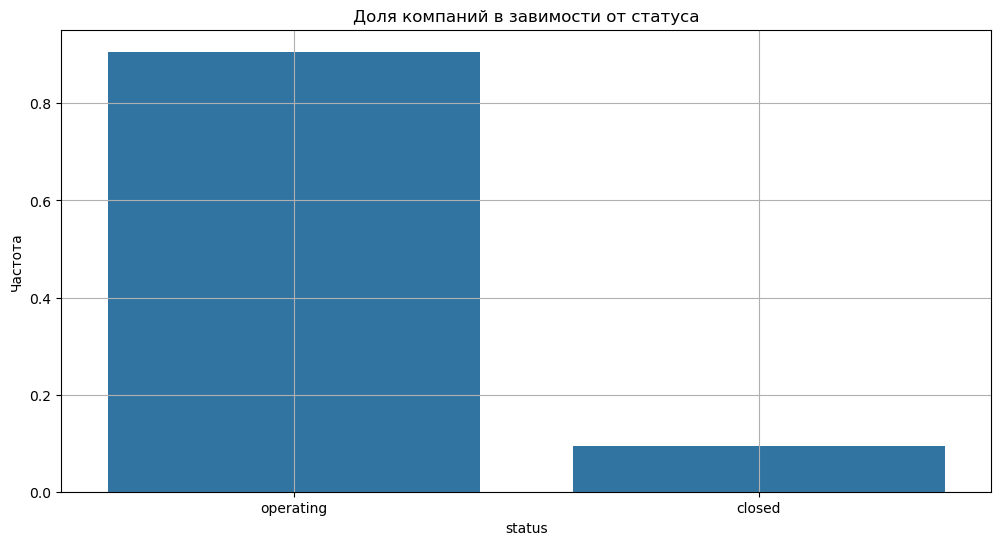

In [30]:
status_counts = df_train['status'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Доля компаний в завимости от статуса')
plt.ylabel('Частота')
plt.grid()
plt.show()

Видим явный дисбаланс классов: 10% закрытых против 90% функционирующих стартапов

### Анализ количественных признаков `df_train`

In [31]:
# Cоздадим функцию для построения гистограммы и ящика с усами 
""" Функция для создания гистограммы и ящика с усами
    Принимает имя датафрейма и список столбцов, для которых строятся графики. Выдает графики
"""
def plot_hist_box(df, column):
    fig, (ax_hist, ax_box,) = plt.subplots(ncols = 2, figsize=(15, 5))

    # зададим графики для каждого ax 
    sns.histplot(df, x=column, ax=ax_hist, bins = 20) 
    sns.boxplot(data = df[column], ax=ax_box)

    ax_hist.grid()
    ax_hist.set(xlabel=column) 
    ax_hist.set(ylabel='Количество') 
    ax_hist.set_title(f'Гистограмма распределения признака {column}') 
    ax_box.set_title(f'Разброс значений признака \n {column}')

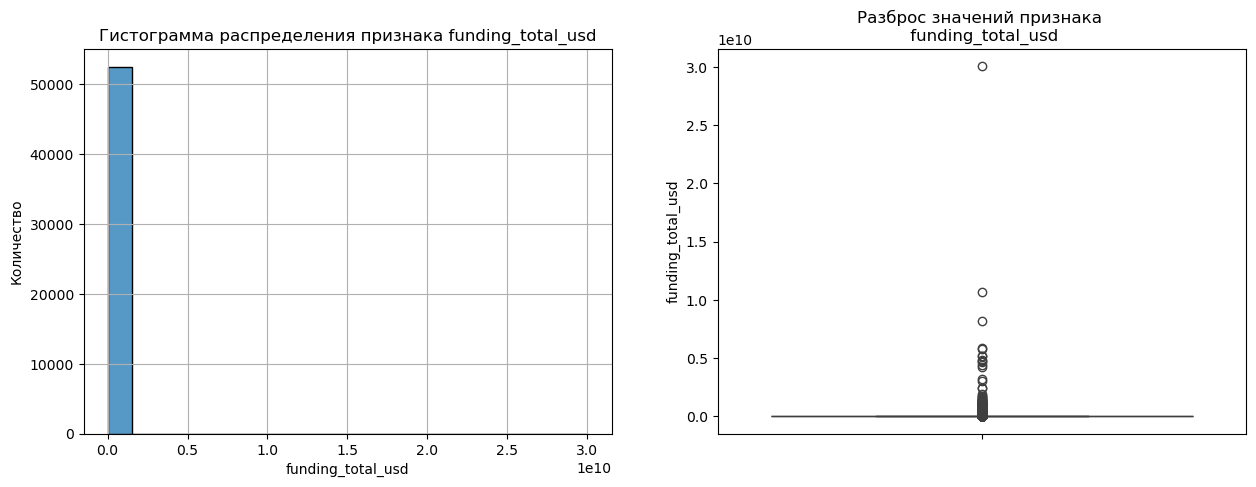

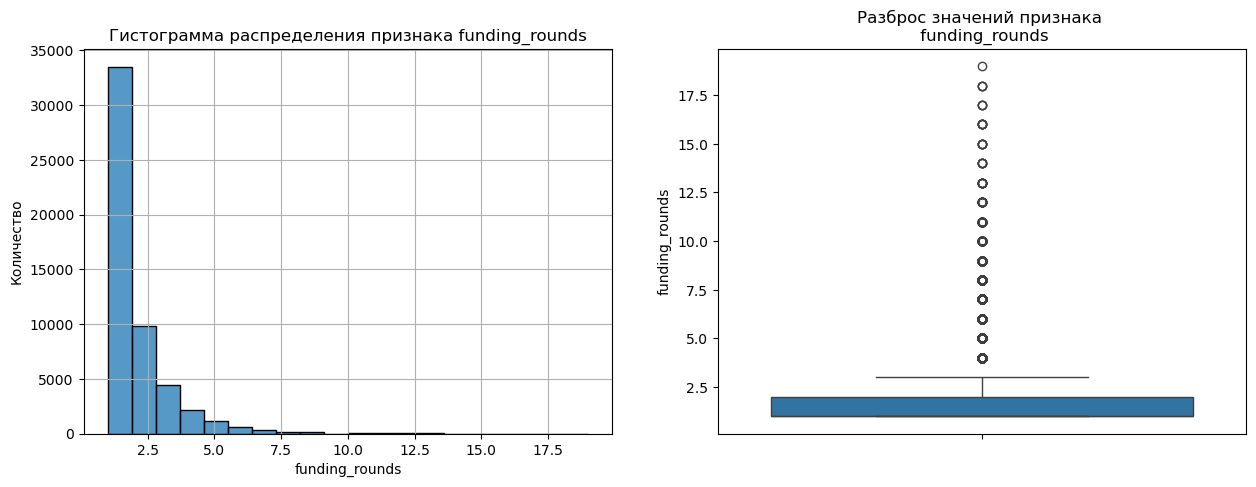

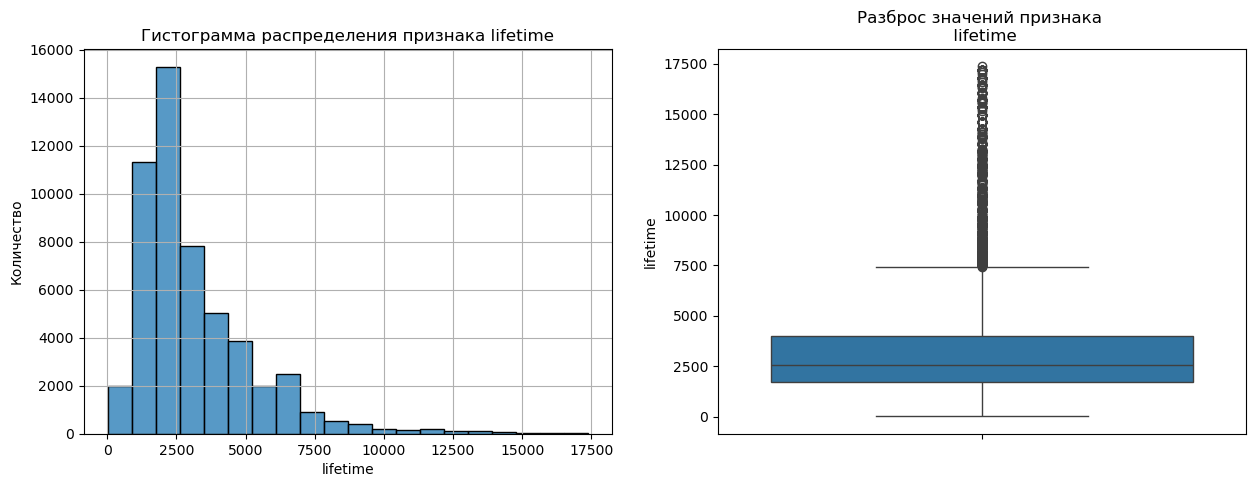

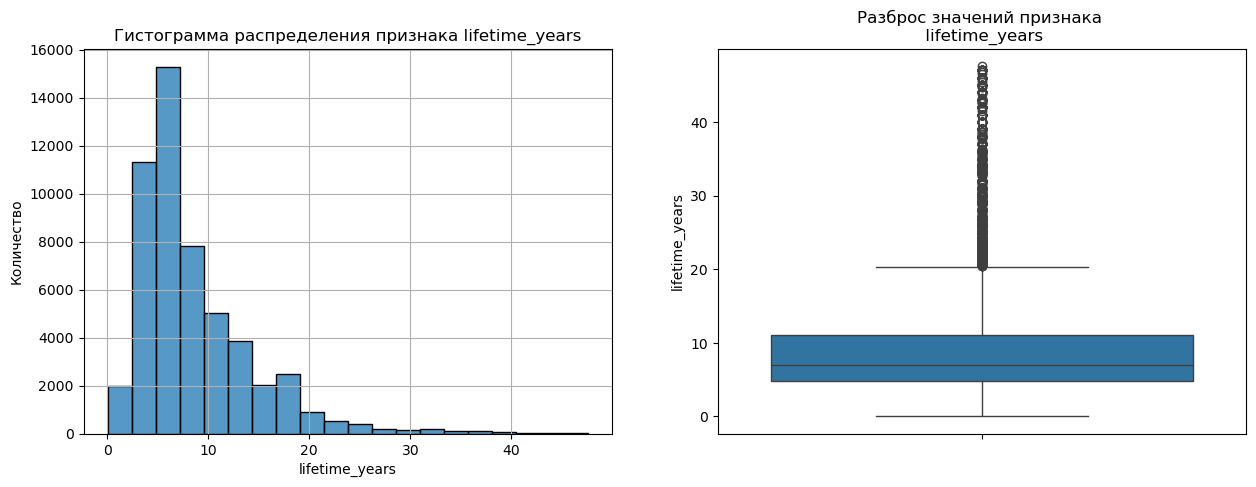

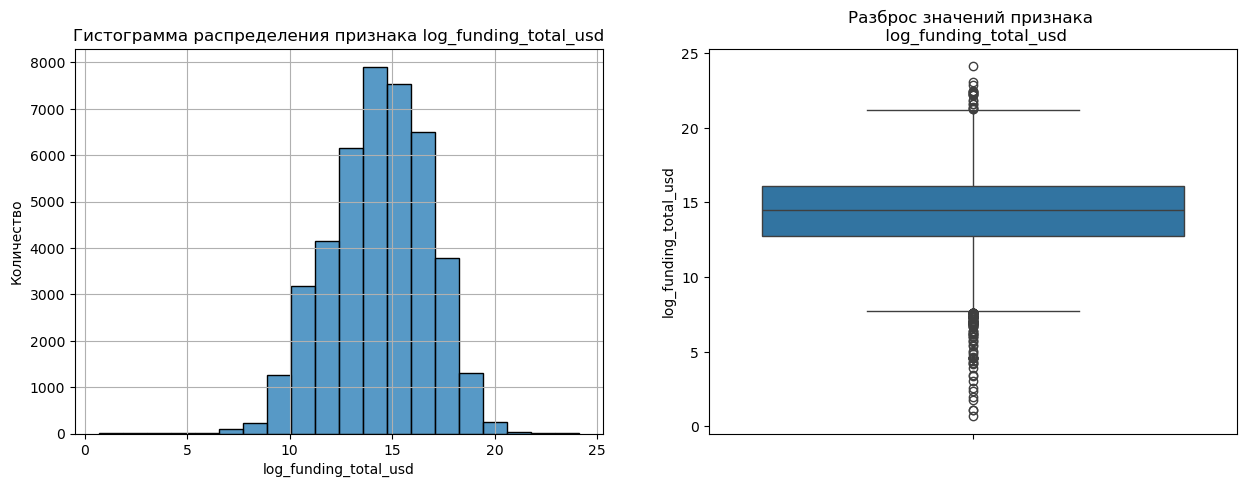

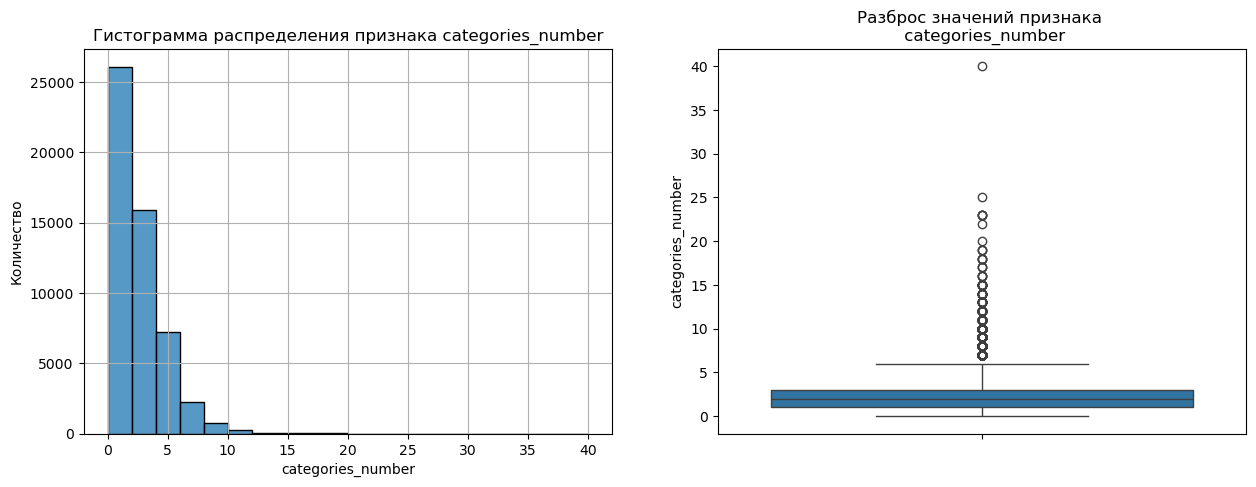

In [32]:
# Определяем список количественных признаков тренировочного датафрейма
numeric_features_train = df_train.select_dtypes(include = ['int', 'float']).columns
# Применим созданную функцию plot_hist_box к тренировочному датафрейму 
for column in numeric_features_train:
    plot_hist_box(df_train, column)

Признаки распределены не нормально, есть выбросы в данных.

#### Оценим распределение признаков в зависимости от целевого признака

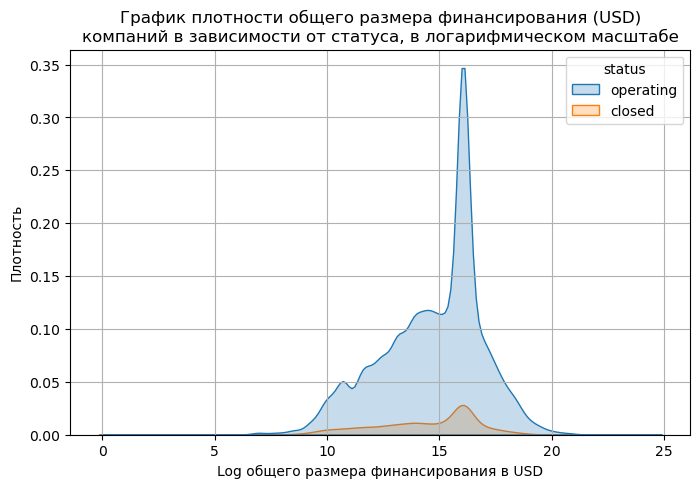

In [33]:
plt.figure(figsize=(8, 5))

# Признак log_funding_total_usd используем в логарифм. масштабе
sns.kdeplot(data=df_train, x=np.log1p(df_train['funding_total_usd']),
            hue='status', fill=True)
plt.title('График плотности общего размера финансирования (USD)\n'
          'компаний в зависимости от статуса, в логарифмическом масштабе')
plt.xlabel('Log общего размера финансирования в USD')
plt.ylabel('Плотность')
plt.grid()

plt.show()

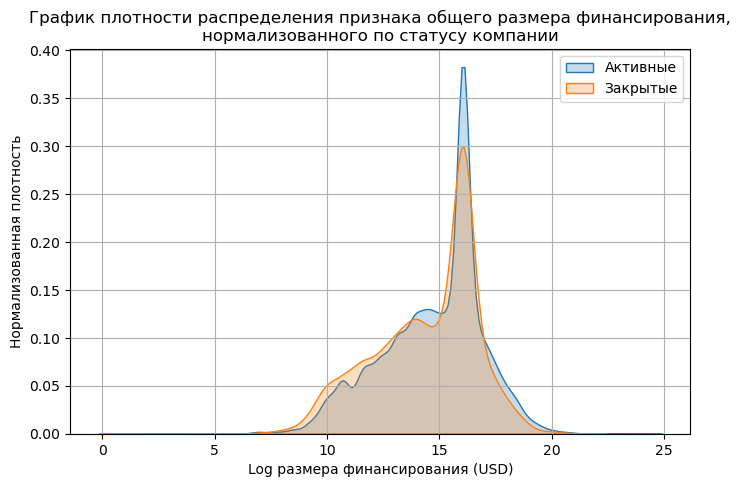

In [34]:
# Построим график плотности распределения признака log_funding_total_usd, но уже нормализованный по признаку status
# Нормализуем данные по признаку status
status_counts = df_train['status'].value_counts(normalize=True)
operating_weight = status_counts['operating']
closed_weight = status_counts['closed']

# Построим график плотности распределения
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_train[df_train['status'] == 'operating'],
    x=np.log1p(df_train[df_train['status'] == 'operating']['funding_total_usd']),
    label='Активные',
    weights=[operating_weight] * len(df_train[df_train['status'] == 'operating']),
    fill=True
)
sns.kdeplot(
    data=df_train[df_train['status'] == 'closed'],
    x=np.log1p(df_train[df_train['status'] == 'closed']['funding_total_usd']),
    label='Закрытые',
    weights=[closed_weight] * len(df_train[df_train['status'] == 'closed']),
    fill=True
)

plt.title('График плотности распределения признака общего размера финансирования,\n'
          'нормализованного по статусу компании')
plt.xlabel('Log размера финансирования (USD)')
plt.ylabel('Нормализованная плотность')
plt.legend()
plt.grid()

plt.show()

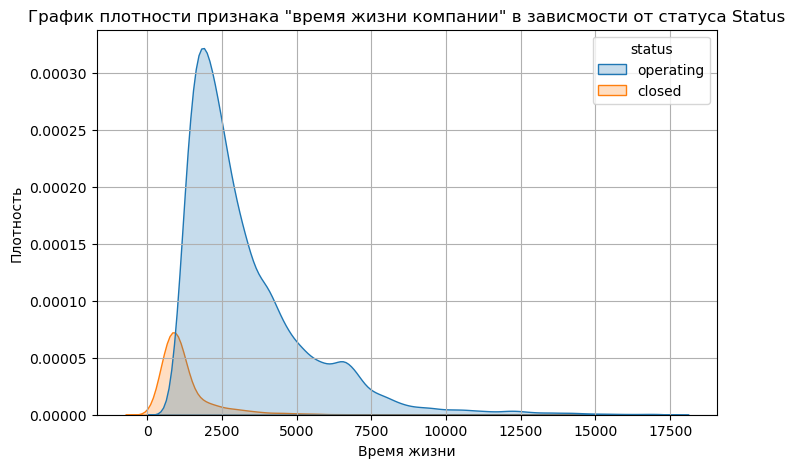

In [35]:
# Построим график плотности распределения признака lifetime, используя seaborn
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_train, x='lifetime', hue='status', fill=True)
plt.title('График плотности признака "время жизни компании" в зависмости от статуса Status')
plt.xlabel('Время жизни')
plt.ylabel('Плотность')
plt.grid()

plt.show()

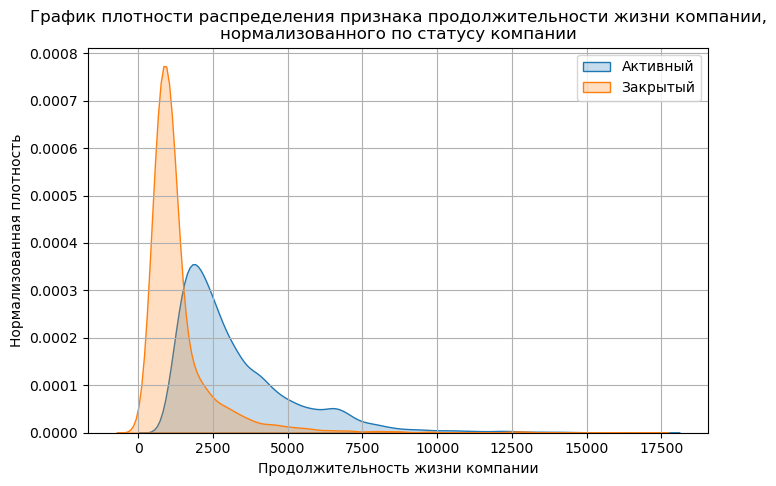

In [36]:
# Построим график плотности распределения признака lifetime, но уже нормализованный по признаку status
# Нормализуем данные по признаку status
status_counts = df_train['status'].value_counts(normalize=True)
operating_weight = status_counts['operating']
closed_weight = status_counts['closed']

# Построим график плотности распределения
plt.figure(figsize=(8, 5))
sns.kdeplot(
    data=df_train[df_train['status'] == 'operating'],
    x='lifetime',
    label='Активный',
    weights=[operating_weight] * len(df_train[df_train['status'] == 'operating']),
    fill=True
)
sns.kdeplot(
    data=df_train[df_train['status'] == 'closed'],
    x='lifetime',
    label='Закрытый',
    weights=[closed_weight] * len(df_train[df_train['status'] == 'closed']),
    fill=True
)

plt.title('График плотности распределения признака продолжительности жизни компании,\n'
          'нормализованного по статусу компании')
plt.xlabel('Продолжительность жизни компании')
plt.ylabel('Нормализованная плотность')
plt.legend()
plt.grid()

plt.show()

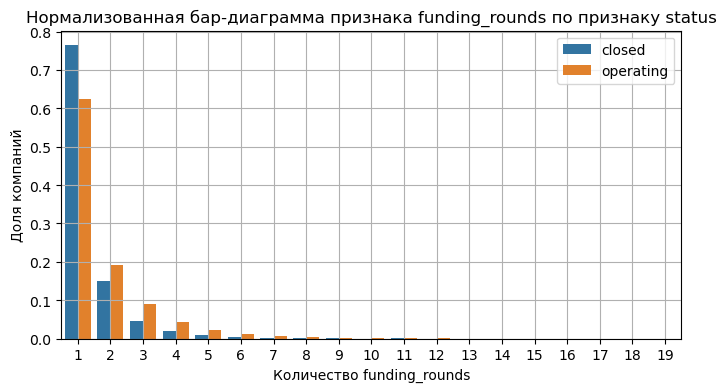

In [37]:
# Создадим функцию для построения бар диаграммы по нормализованным данным
def normalized_status_bar_chart(df, feature, target):
    # Create a DataFrame with counts of occurrences
    count_df = df.groupby([target, feature]).size().reset_index(name='counts')

    # Calculate the total counts for each status category
    total_counts = count_df.groupby(target)['counts'].transform('sum')

    # Calculate the normalized count
    count_df['normalized_count'] = count_df['counts'] / total_counts

    # Create the dodged bar chart
    plt.figure(figsize=(8, 4))
    bar_chart = sns.barplot(x=feature, y='normalized_count', hue=target, data=count_df, dodge=True)
    plt.title('Нормализованная бар-диаграмма признака {} по признаку {}'.format(feature, target))
    plt.xlabel('Количество {}'. format(feature))
    plt.ylabel('Доля компаний')
    plt.legend(loc='upper right')
    plt.grid()
    
    plt.show()

# Usage
normalized_status_bar_chart(df_train, 'funding_rounds', 'status')

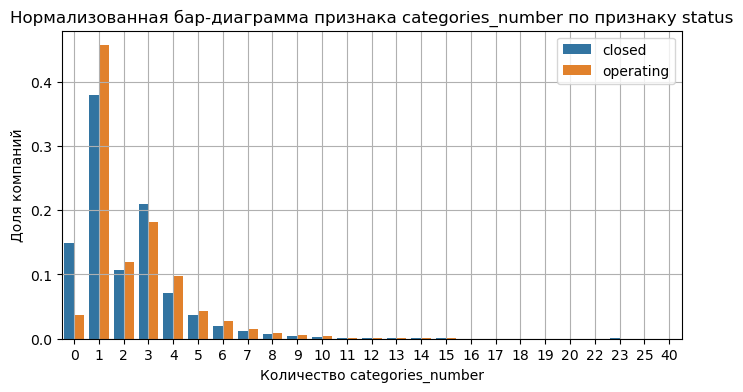

In [38]:
### Посмотрим, влияет ли на статус компании количество заявленных категорий
normalized_status_bar_chart(df_train, 'categories_number', 'status')


### Анализ количественных признаков `df_test`

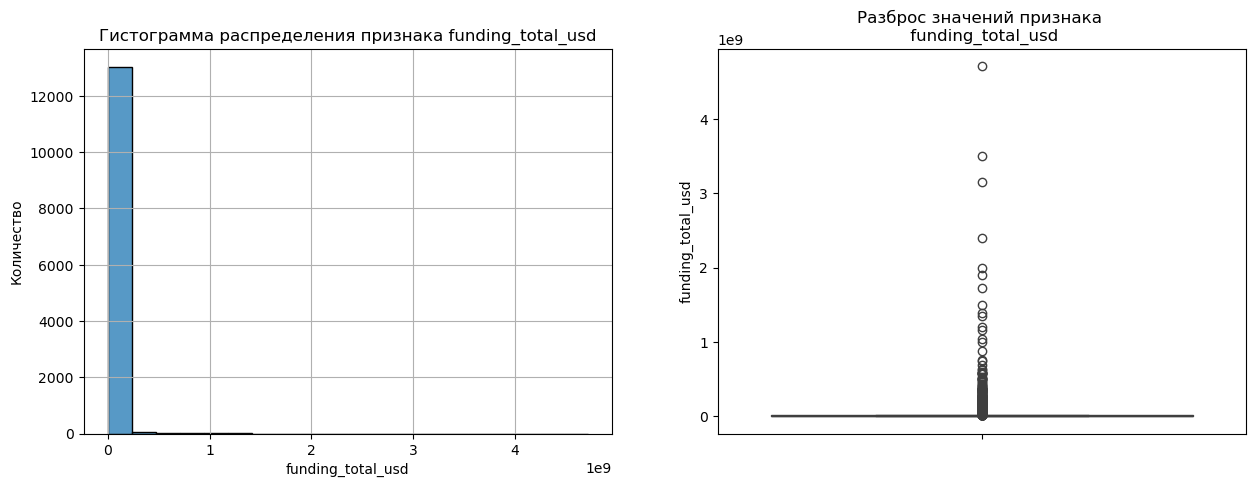

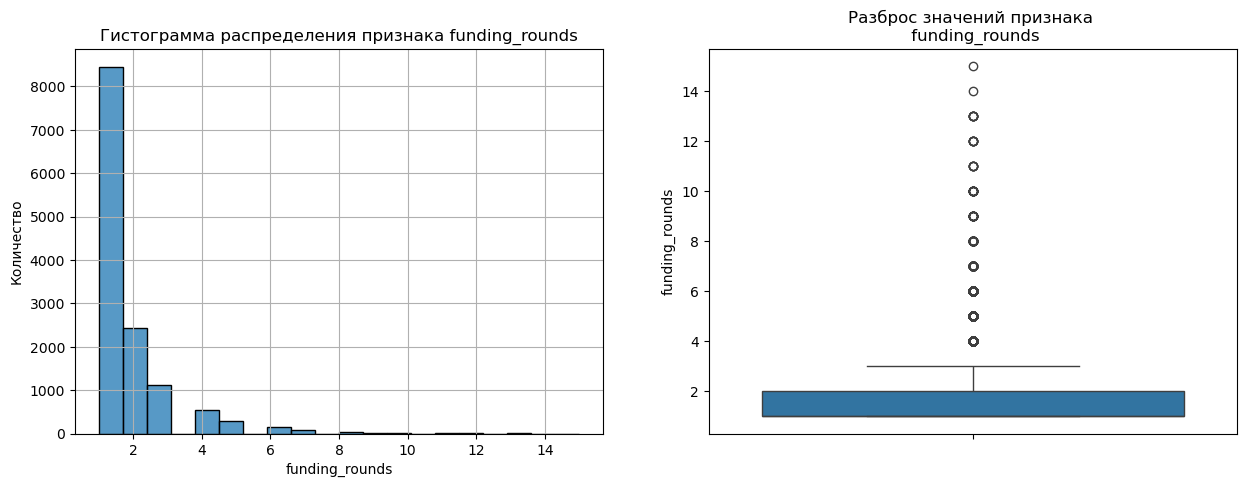

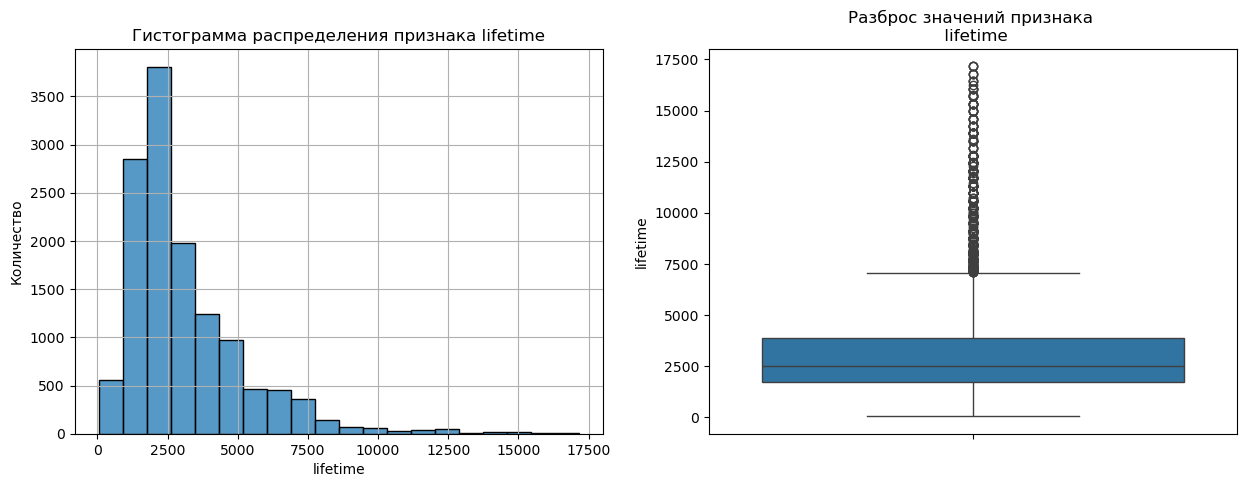

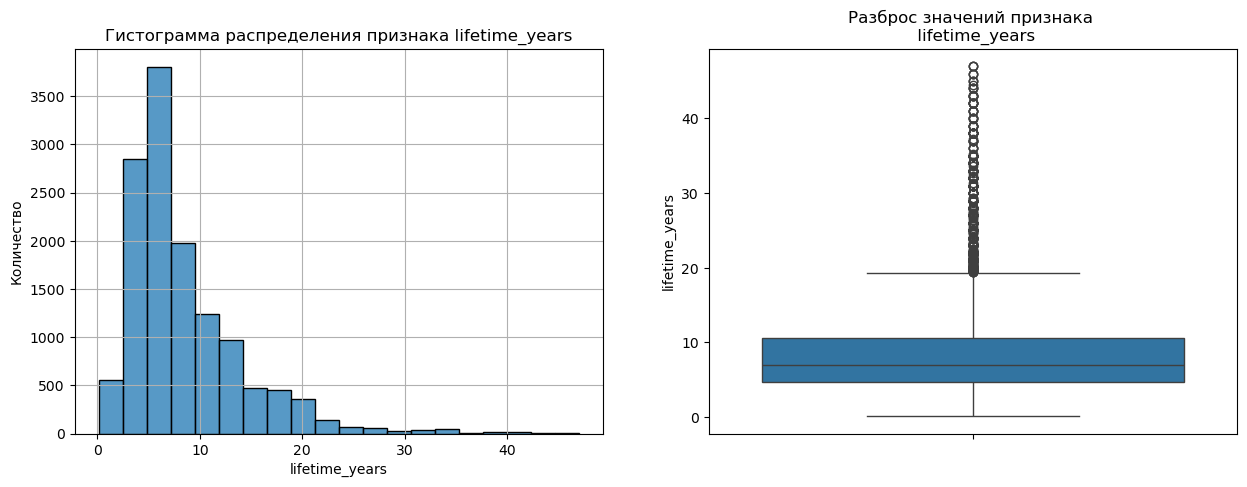

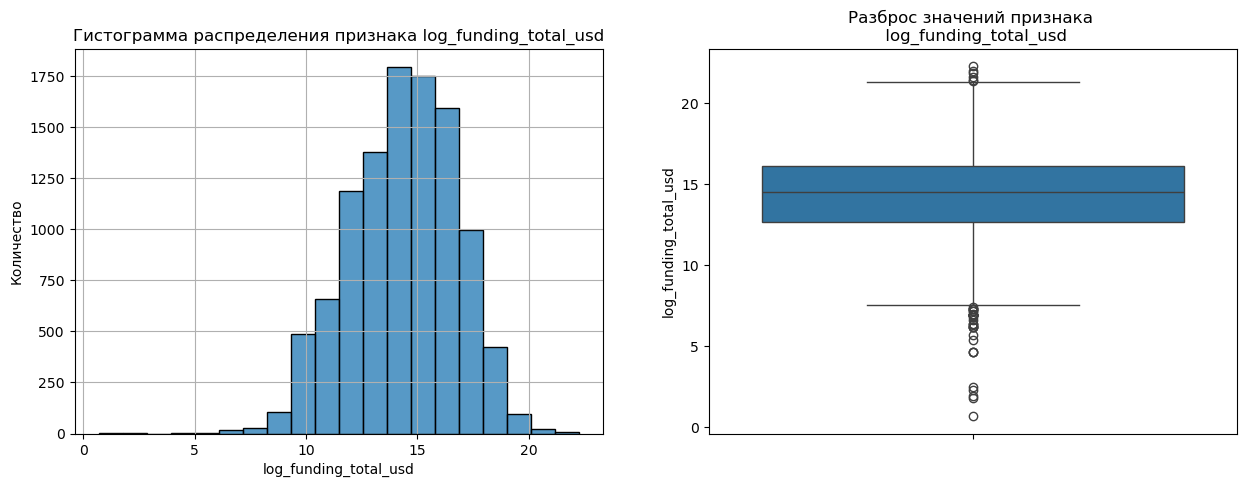

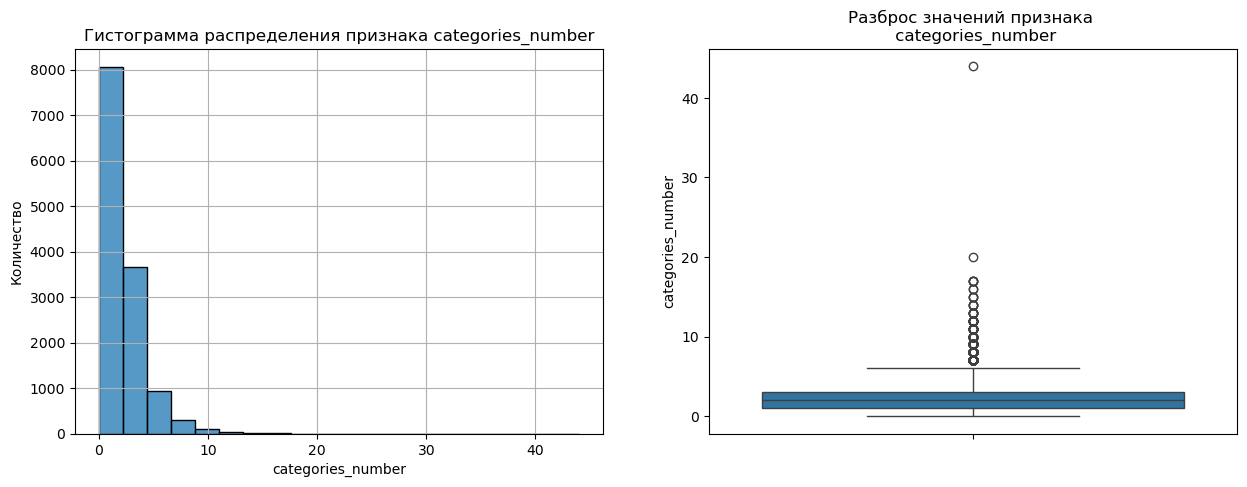

In [39]:
# Определяем список количественных признаков тренировочного датафрейма
numeric_features_test = df_test.select_dtypes(include = ['int', 'float']).columns
# Применим созданную функцию plot_hist_box к тренировочному датафрейму 
for column in numeric_features_test:
    plot_hist_box(df_test, column)

Как и в тренировочной выборке признаки распределены не нормально, в данных присутствуют выбросы.



#### Сравним распределение тренировочных и тестовых данных

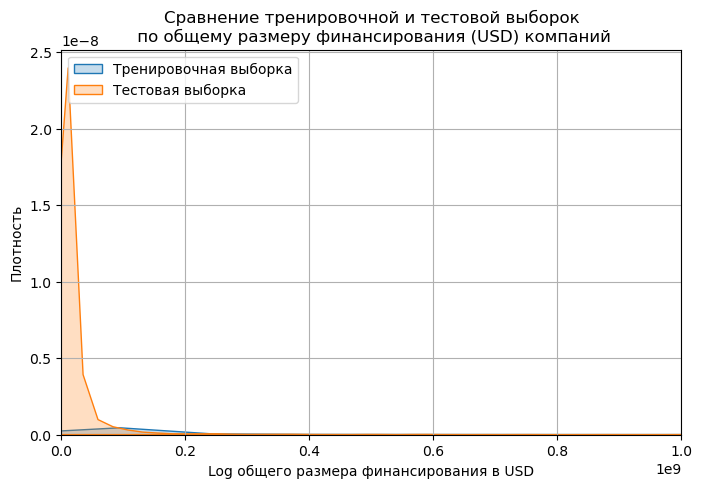

In [40]:
# Построим график плотности признака, используя seaborn для двух датафреймов
plt.figure(figsize=(8, 5))
# Сравнение выполним в логарифмическом масштабе из-за большой дисперсии признака

sns.kdeplot(data=df_train, x='funding_total_usd', 
            fill=True, label='Тренировочная выборка')
sns.kdeplot(data=df_test, x='funding_total_usd', 
            fill=True, label='Тестовая выборка')

plt.title('Сравнение тренировочной и тестовой выборок\n по общему размеру финансирования (USD) компаний')
plt.xlabel('Log общего размера финансирования в USD')
plt.ylabel('Плотность')
plt.legend(loc='upper left')
plt.grid()
plt.xlim(0, 1e9)

plt.show()

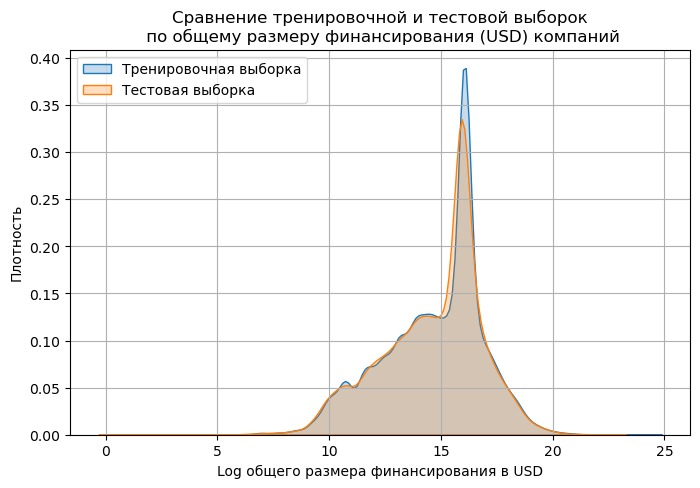

In [41]:
# Построим график плотности признака, используя seaborn для двух датафреймов
plt.figure(figsize=(8, 5))
# Сравнение выполним в логарифмическом масштабе из-за большой дисперсии признака

sns.kdeplot(data=df_train, x=np.log1p(df_train['funding_total_usd']), 
            fill=True, label='Тренировочная выборка')
sns.kdeplot(data=df_test, x=np.log1p(df_test['funding_total_usd']), 
            fill=True, label='Тестовая выборка')

plt.title('Сравнение тренировочной и тестовой выборок\n по общему размеру финансирования (USD) компаний')
plt.xlabel('Log общего размера финансирования в USD')
plt.ylabel('Плотность')
plt.legend(loc='upper left')
plt.grid()

plt.show()

Как видно из графиков, тестовая и тренировочная выборки имеют аналогичное распределение количественных признаков.

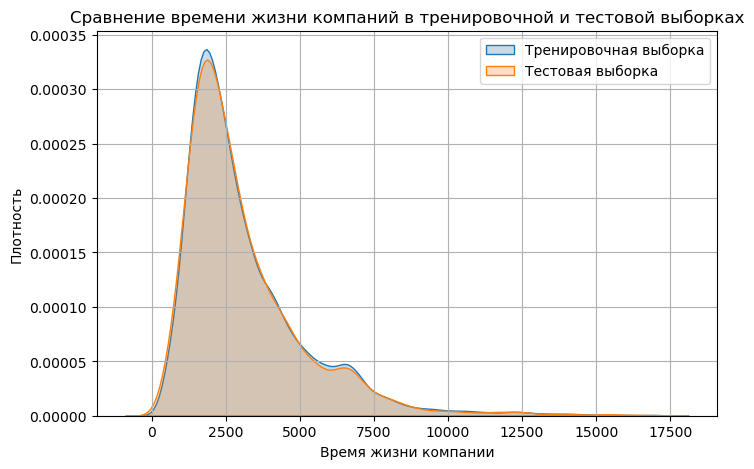

In [42]:
# Построим график плотности распределения
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df_train['lifetime'], label='Тренировочная выборка', fill=True)

sns.kdeplot(data=df_test['lifetime'], label='Тестовая выборка', fill=True)

plt.title('Сравнение времени жизни компаний в тренировочной и тестовой выборках')
plt.xlabel('Время жизни компании')
plt.ylabel('Плотность')
plt.legend(loc = 'upper right')
plt.grid()

plt.show()

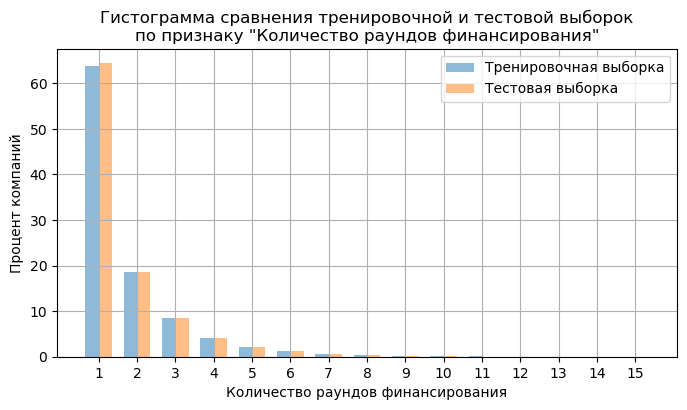

In [43]:
funding_rounds_range = range(1, 16)

# Отфильтруем датафрейм по признаку  funding_rounds 
df_train_filtered = df_train[df_train['funding_rounds'].isin(funding_rounds_range)]
df_test_filtered = df_test[df_test['funding_rounds'].isin(funding_rounds_range)]

# Вычисли количества для каждого раунда финансирования
counts_df_train = df_train_filtered['funding_rounds'].value_counts().reindex(
                                                   funding_rounds_range, fill_value=0)
counts_df_test = df_test_filtered['funding_rounds'].value_counts().reindex(funding_rounds_range, fill_value=0)
                      
# Нормализуем количество, чтобы получить процент
percentage_df_train = (counts_df_train / counts_df_train.sum()) * 100
percentage_df_test = (counts_df_test / counts_df_test.sum()) * 100

# Определим ширину бара и сдвиг
bar_width = 0.35
shift = bar_width / 2

# Определим положение каждого бара
positions_df_train = np.arange(len(funding_rounds_range)) - shift
positions_df_test = np.arange(len(funding_rounds_range)) + shift

# Построим график
plt.figure(figsize=(8, 4))
plt.bar(positions_df_train, percentage_df_train, width=bar_width, label='Тренировочная выборка', alpha=0.5)
plt.bar(positions_df_test, percentage_df_test, width=bar_width, label='Тестовая выборка', alpha=0.5)

plt.title('Гистограмма сравнения тренировочной и тестовой выборок\n'
          'по признаку "Количество раундов финансирования"')
plt.xlabel('Количество раундов финансирования')
plt.ylabel('Процент компаний')
plt.xticks(np.arange(len(funding_rounds_range)), funding_rounds_range)
plt.legend()
plt.grid()

plt.show()

## Добавление признаков

### Тренировочная выборка

In [44]:
# Введем дополнительные синтетические признаки 
df_train['funding_rounds_per_year'] = df_train['funding_rounds'] / df_train['lifetime_years']
df_train['funding_total_per_year'] = df_train['funding_total_usd'] / df_train['lifetime_years']
df_train['funding_total_per_round'] = df_train['funding_total_usd'] / df_train['funding_rounds']
df_train['funding_lifetime_ratio'] = df_train['funding_total_usd'] / df_train['lifetime_years']

# Такие же признаки, но для funding_total_year в логарифмическим масштабе
df_train['log_funding_total_year'] = df_train['funding_total_usd'] / df_train['lifetime_years']
df_train['log_funding_total_per_round'] = df_train['funding_total_usd'] / df_train['funding_rounds']
df_train['log_funding_lifetime_ratio'] = df_train['funding_total_usd'] / df_train['lifetime_years']

# заменим бесконечные значения 0
df_train.replace([float('inf'), -float('inf')], 0, inplace=True)

In [45]:
df_train.sample(5)

name         category_list  funding_total_usd     status country_code state_code         region              city  funding_rounds founded_at first_funding_at last_funding_at  closed_at  lifetime  lifetime_years  log_funding_total_usd  categories_number  funding_rounds_per_year  funding_total_per_year  funding_total_per_round  funding_lifetime_ratio  log_funding_total_year  log_funding_total_per_round  log_funding_lifetime_ratio
42548                          XGraph             Analytics         3750000.00  operating          USA         NY  New York City          New York               1 2008-10-01       2010-07-07      2010-07-07 2018-01-01      3379            9.25                  15.14                  1                     0.11               405352.92               3750000.00               405352.92               405352.92                   3750000.00                   405352.92
4385   Implandata Ophthalmic Products           Health Care         8521872.00  operating          DEU          6        Hanover           Hanover               4 2009-07-25       2010-06-21      2014-10-27 2018-01-01      3082            8.44                  15.96                  1                     0.47              1009933.08               2130468.00              1009933.08              1009933.08                   2130468.00                  1009933.08
3899                     PicaHome.com  Real Estate|Startups           25000.00  operating          USA         CA    Los Angeles  Westlake Village               1 2014-01-01       2014-01-15      2014-01-15 2018-01-01      1461            4.00                  10.13                  2                     0.25                 6250.00                 25000.00                 6250.00                 6250.00                     25000.00                     6250.00
42355                     Armory Fuel                Retail          283500.00  operating          USA         MO        Branson       Springfield               1 2014-02-11       2014-10-02      2014-10-02 2018-01-01      1420            3.89                  12.55                  1                     0.26                72921.39                283500.00                72921.39                72921.39                    283500.00                    72921.39
46038                  Sight Sciences   Health and Wellness         7463969.00  operating          USA         CA    SF Bay Area     San Francisco               2 2010-07-08       2011-09-12      2015-10-30 2018-01-01      2734            7.49                  15.83                  1                     0.27               997152.41               3731984.50               997152.41               997152.41                   3731984.50                   997152.41

### Тестовая выборка

In [46]:
# Введем дополнительные синтетические признаки 
df_test['funding_rounds_per_year'] = df_test['funding_rounds'] / df_test['lifetime_years']
df_test['funding_total_per_year'] = df_test['funding_total_usd'] / df_test['lifetime_years']
df_test['funding_total_per_round'] = df_test['funding_total_usd'] / df_test['funding_rounds']
df_test['funding_lifetime_ratio'] = df_test['funding_total_usd'] / df_test['lifetime_years']

# Такие же признаки, но для funding_total_year в логарифмическим масштабе
df_test['log_funding_total_year'] = df_test['funding_total_usd'] / df_test['lifetime_years']
df_test['log_funding_total_per_round'] = df_test['funding_total_usd'] / df_test['funding_rounds']
df_test['log_funding_lifetime_ratio'] = df_test['funding_total_usd'] / df_test['lifetime_years']

# Handle infinite values resulting from division by zero
df_test.replace([float('inf'), -float('inf')], 0, inplace=True)

In [47]:
df_test.head()

name                   category_list  funding_total_usd country_code state_code            region              city  funding_rounds first_funding_at last_funding_at  lifetime  lifetime_years  log_funding_total_usd  categories_number  funding_rounds_per_year  funding_total_per_year  funding_total_per_round  funding_lifetime_ratio  log_funding_total_year  log_funding_total_per_round  log_funding_lifetime_ratio
0              Crystalsol                Clean Technology         2819200.00      unknown    unknown           unknown           unknown               1       2009-07-01      2009-07-01      3501            9.59                  14.85                  1                     0.10               294119.62               2819200.00               294119.62               294119.62                   2819200.00                   294119.62
1        JBI Fish & Wings                     Hospitality         8307623.73          USA         TN        TN - Other          Humboldt               1       2010-07-28      2010-07-28      2717            7.44                    NaN                  1                     0.13              1116805.14               8307623.73              1116805.14              1116805.14                   8307623.73                  1116805.14
2                COINPLUS                         Finance          428257.00          LUX          3  Esch-sur-alzette  Esch-sur-alzette               2       2014-05-15      2014-09-18      1295            3.55                  12.97                  1                     0.56               120788.32                214128.50               120788.32               120788.32                    214128.50                   120788.32
3  Imagine Communications  Software|Video|Video Streaming        34700000.00          USA         CA         San Diego         San Diego               4       2005-01-01      2010-04-20      4748           13.00                  17.36                  3                     0.31              2669371.31               8675000.00              2669371.31              2669371.31                   8675000.00                  2669371.31
4                   DNA13                        Software         4530000.00          CAN         ON            Ottawa            Ottawa               1       2007-05-08      2007-05-08      6209           17.00                  15.33                  1                     0.06               266481.32               4530000.00               266481.32               266481.32                   4530000.00                   266481.32

### Оценим Корреляцию признаков

In [48]:
# Задаем списки количественных и категориальных признаков и проведем подбор признаков для обучения модели

num_columns = [
            'log_funding_total_usd',
#            'funding_total_usd',
#            'funding_rounds', 
#            'lifetime_year', 
            'lifetime', 
#            'categories_number',
            'funding_rounds_per_year',
#            'funding_total_per_year',
#            'funding_total_per_round',
#            'funding_lifetime_ratio',
    
#            'log_funding_total_year',
#            'log_funding_total_per_round',
            'log_funding_lifetime_ratio'
            ]

ohe_columns = [
#            'country_code',
#            'state_code', 
#            'region',
#            'city'
            ]


In [49]:
column_processed = num_columns.copy()
#column_processed.extend(ohe_columns)

interval columns not set, guessing: ['log_funding_total_usd', 'lifetime', 'funding_rounds_per_year', 'log_funding_lifetime_ratio']


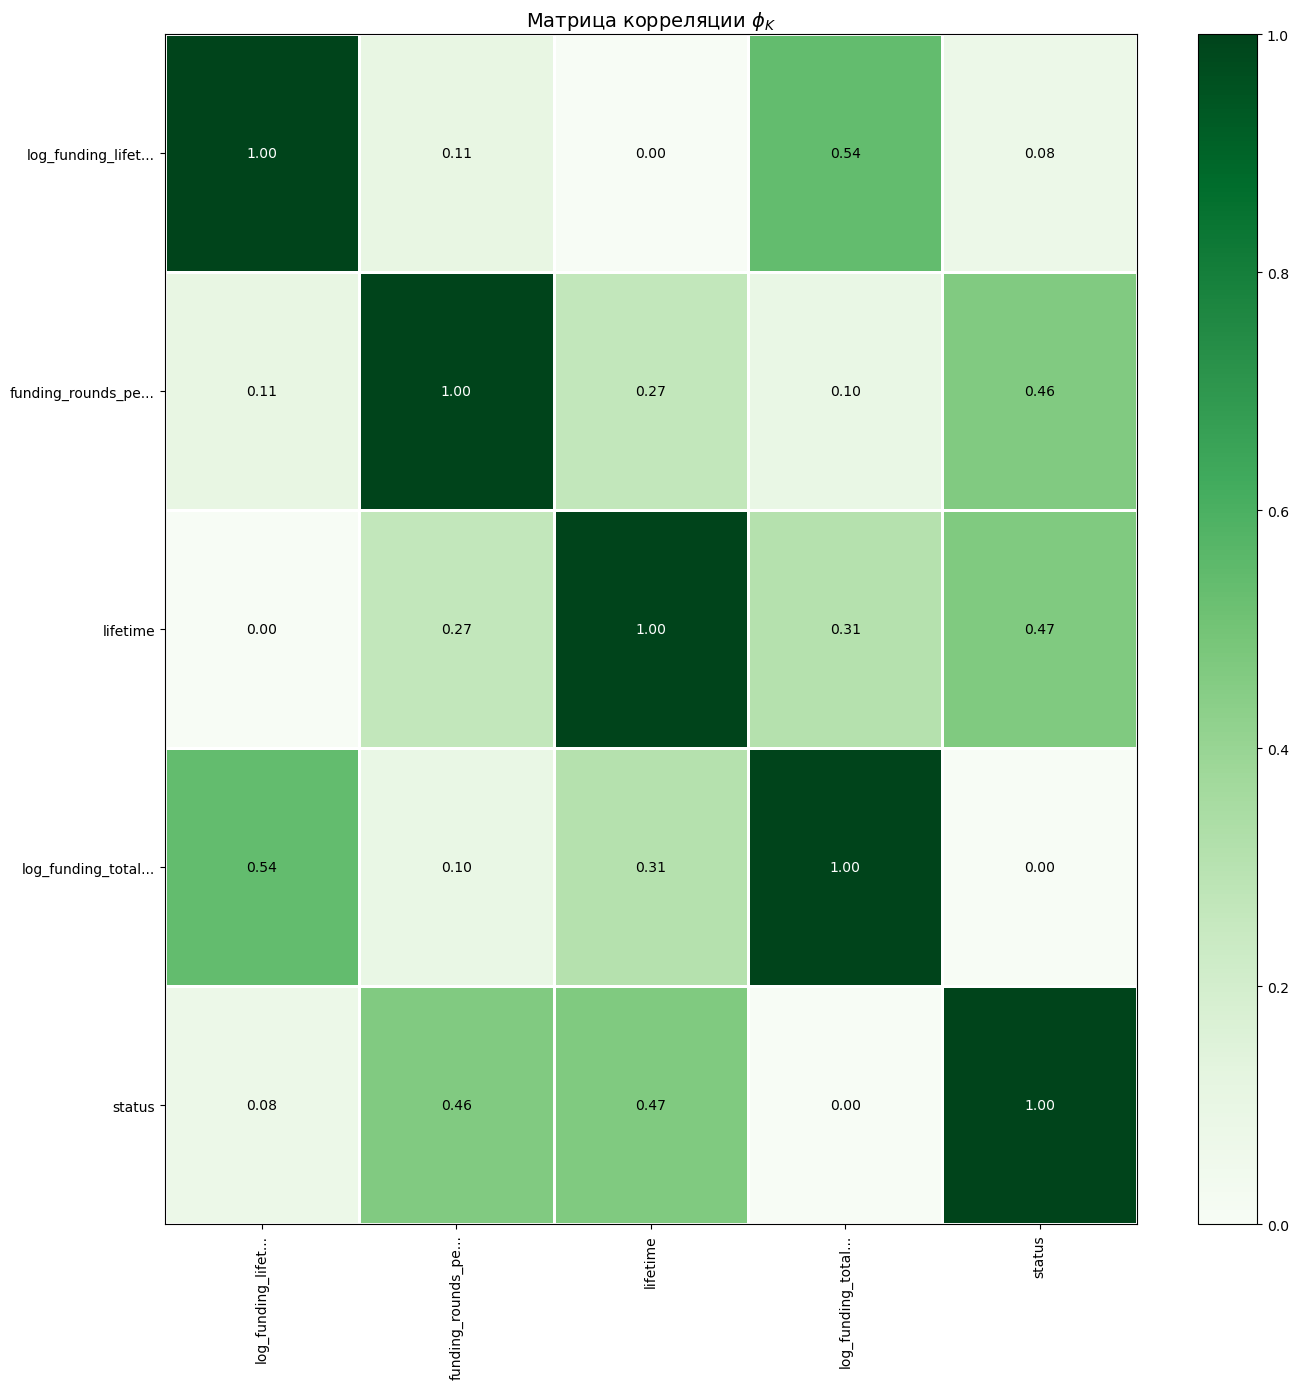

In [50]:
corr_list = ['status']
corr_list.extend(column_processed)
phik_overview = df_train[corr_list].sample(1000).phik_matrix() 
plot_correlation_matrix(
    phik_overview.values, x_labels=phik_overview.columns, 
    y_labels=phik_overview.index, vmin=0, vmax=1, color_map='Greens', 
    title=r'Матрица корреляции $\phi_K$', fontsize_factor=1, figsize=(14,14)) 

plt.tight_layout()

## Создание пайплайна

In [51]:
RANDOM_STATE = 42

In [52]:
# Задаем тренировочную выборку

X = df_train[column_processed]
y = df_train['status'].map({'closed': 1, 'operating': 0})

# Делим тренировочную выборку на две для тренировки и тестирования
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.67, random_state=RANDOM_STATE)

# Проверка наличия пропущенных значений в столбце 'status'
missing_values = df_train['status'].isnull().sum()
print(f"Количество пропущенных значений в столбце 'status': {missing_values}")

Количество пропущенных значений в столбце 'status': 0


In [53]:
# Создадим пайплайн для подготовки входных данных
# Паплайн для заполнения пропусков и обработки категориальных признаков 

ohe_pipe = Pipeline([ 
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')), 
    ('ohe', OneHotEncoder(drop = 'first', categories = 'auto',
                          handle_unknown = 'ignore', sparse_output = False))
    ])

# Паплайн для обработки числовых признаков: заполнение пропусков и масштабирование для количественных признаков 

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())  
    ])

# Создадим ColumnTransformer для подготовки данных
data_preprocessor = ColumnTransformer([
     ('ohe', ohe_pipe, ohe_columns),
     ('num', num_pipe, num_columns)
],
remainder='drop' )

In [54]:
# Создадим словарь гиперпараметров для каждой используемой модели
param_grid = {
    
    'Logistic Regression': {
        'models__max_iter': [1000],
        'models__C': [1.0, 10],
        'models__solver': ['liblinear'],
        'models__penalty': ['l2', 'l1'],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]
    },

    'RandomForestClassifier': {
        'models__max_depth': [5, 10, 15],
        'models__min_samples_split': [2, 4, 6],
        'models__min_samples_leaf': [2, 4, 6],
        'models__class_weight': ['balanced'],
        'preprocessor__num__scaler': [StandardScaler(), RobustScaler()
#                                      MinMaxScaler(), 
                                     ]
    },
    'DecisionTreeClassifier': {
        'models__max_depth': [5, 10, 15],
        'models__min_samples_split': [2, 4, 6],
        'models__min_samples_leaf': [2, 4, 6],
        'models__class_weight': ['balanced'],
        'preprocessor__num__scaler': [StandardScaler(), RobustScaler()
#                                      MinMaxScaler(), 
                                     ]
    },
    'Boosting': {
        'models__min_samples_leaf': [2, 5],
        'models__min_samples_split': [2, 4],
        'models__max_depth': [10],
        'preprocessor__num__scaler': [RobustScaler()]
    }

}

# Создадим словарь используемых моделей
models = {

    "Logistic Regression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "Boosting": GradientBoostingClassifier(),
}

# Создадим пустой словарь пайплайнов моделей 
model_pipelines = {}

for name, model in models.items():
    model_pipelines[name] = ImbPipeline(steps=[('preprocessor', data_preprocessor), 
                                               ('smote', SMOTE()),
                                               ('models', model)])


In [55]:
def select_model(name):
    '''В этой функции вычисляем оптимальные гиперпараметры для модели name
    Функция возвращает:
    ''' 
     
    search = RandomizedSearchCV(model_pipelines[name], param_grid[name], cv=5, scoring='f1', n_jobs=-1)
    search.fit(X_train, y_train)
    
    cv_scores = cross_val_score(search, X_train, y_train, cv=5, scoring='f1')

    # Предсказание вероятностей
    y_probs = search.best_estimator_.predict_proba(X_validation)[:, 1]

    # Вычисление precision-recall кривой
    precision, recall, thresholds = precision_recall_curve(y_validation, y_probs)

    # Нахождение лучшего порога для F1-меры
    f1_scores = 2 * (precision * recall) / (precision + recall)
    best_threshold = thresholds[np.argmax(f1_scores)]

    # Предсказание с использованием лучшего порога
    y_pred = (y_probs >= best_threshold).astype(int)

    # Вычисление F1-меры
    f1 = round(f1_score(y_validation, y_pred), 3)

    my_tuple = (search.best_params_, round(search.best_score_, 3), round(cv_scores.mean(), 3),
               round(cv_scores.std(), 2), round(best_threshold, 3), f1) 
    
    return my_tuple, cv_scores, search.best_estimator_

In [56]:
model_name = 'RandomForestClassifier'

In [57]:
my_output, my_cv_scores, my_best_estimator = select_model(model_name)

In [58]:
print(my_cv_scores)

[0.6291591  0.63070006 0.62681159 0.61480552 0.61037394]


In [59]:
print(f'Лучшие параметры для {model_name}: {my_output[0]}')
print()
print(f'Лучшее значение F1 для {model_name}: {my_output[1]}')
print()
print(f'Среднее значение тренировочного F1 = {my_output[2]}')
print(f'Mean STD = +- {my_output[3]}')
print()
print(f'Лучший порог: {my_output[4]}')
print()
print(f'Значение F1 для лучшего порога: {my_output[5]}')

Лучшие параметры для RandomForestClassifier: {'preprocessor__num__scaler': StandardScaler(), 'models__min_samples_split': 6, 'models__min_samples_leaf': 4, 'models__max_depth': 10, 'models__class_weight': 'balanced'}

Лучшее значение F1 для RandomForestClassifier: 0.619

Среднее значение тренировочного F1 = 0.622
Mean STD = +- 0.01

Лучший порог: 0.804

Значение F1 для лучшего порога: 0.709


In [60]:
# Создадим функцию для визуализации важности признаков 
""" Функция для визуализации важности признаков
    Принимает значения:
    словарь best_estimators (ключ - имя модели,
    значения - пайплайн для тренированной модели с оптимальными параметрами),
    X_train, X_test (тренировочная и тестовая выборки), y_test (целевой признак),
    scorer - метрика оценки точности предсказания модели.
    Выдает графики:
    распределение признаков по важности """

def feature_importance(best_estimator, X_train, X_test, y_test): 
    feature_names = X_train.columns
    perm_importance = permutation_importance(best_estimator, X_test, y_test, scoring = 'f1') 
    feature_importances = perm_importance.importances_mean
    mean_importance = perm_importance.importances_mean.round(2)
    std_importance = perm_importance.importances_std.round(2)
    sorted_indices = mean_importance.argsort()[::-1] 
    sorted_feature_names = [feature_names[i] for i in sorted_indices] 
    sorted_mean_importance = mean_importance[sorted_indices] 
    sorted_std_importance = std_importance[sorted_indices]
    print(sorted_std_importance)
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=sorted_mean_importance, 
        y=sorted_feature_names, 
        #xerr=sorted_std_importance, 
        palette='viridis'
    ) 
    plt.xlabel('Оценка важности')
    plt.ylabel('Признак')
    plt.title(f'Признаки, отсортированные по важности - Модель: {name}')
    plt.grid()
    plt.show()

[0.01 0.01 0.   0.  ]


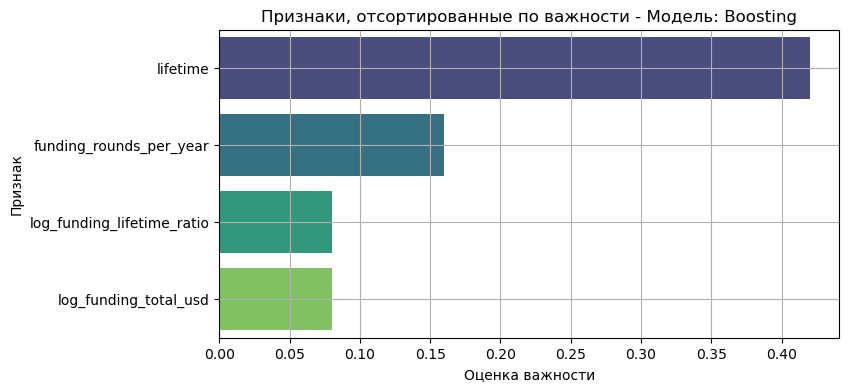

In [61]:
feature_importance(my_best_estimator, X_train, X_validation, y_validation)

### Работа модели на тестовых данных

In [62]:
# Задаем тренировочную выборку

X_test = df_test[column_processed]


In [63]:
probabilities = my_best_estimator.predict_proba(X_test)[:, 1]

# Применение лучшего порога для предсказания статуса закрытия
best_threshold = 0.7264427412085797
y_pred_test = (probabilities >= best_threshold).astype(int)

In [64]:
status_test = pd.Series(y_pred_test)

status_test.value_counts(normalize = True)

0   0.90
1   0.10
Name: proportion, dtype: float64

In [65]:
df_test['status'] = y_pred_test 

In [66]:
df_test['status'] = df_test['status'].replace({1: 'closed', 0: 'operating'})

In [67]:
df_test_final = df_test[['name', 'status']]
df_test_final.head()

name     status
0              Crystalsol  operating
1        JBI Fish & Wings  operating
2                COINPLUS     closed
3  Imagine Communications  operating
4                   DNA13  operating

In [68]:
df_test_final.to_csv('kaggle.csv', index=False)

дача заключалась в выявлении стартапов, которые являются закрытыми

Были изучены полученные датасеты (тренировочный и тестовый). В тестовом датасете отсутствовал целевой признак - статус компании, который и надо было предсказать.
Другое отличие заключалось в том, что в тестовой выборке у компаний отсутствовали признаки: дата создания и дата закрытия компании, но был признак - время жизни (в днях).

В тренировочный датасет был добавлен признак - аремя жизни.

При сравнении двух датасетов было обнаружено по большинству количественных признаков они аналогичны.

Анализ корреляции признаков выявил наличие нескольких гиперколлениарных признаков, в основном, относящихся к географическому местоположению компании. В связи с этим для дальнейшей работы был выбран наиболее крупный признак _ код страны. Пустые строки в этой колонке, которых оказалось около 20: (существенное количество) были заполнены признаком "unknown" для дальнейшего учета этого признака в выборке.

Много пропусков содержал и признак, относящийся к общей сумме финансирования (около 18%). Пропуски значений в этом случае были заполнены средними значеиями в зависимости от количества раундов финансирования.

Были созданы синтетические признаки, такие как количество категорий, которые были указаны в качестве области деятельности компании. Количество было определено по количеству разделителей '|' + 1. 

В качестве тренировочных моделей были взяты Logistic Regression, RandomForestClassifier, DecisionTreeClassifier, SVC, GradientBoostingClassifier. Результаты моделей изучались по отдельности в целях экономии времени. Модели SVC, GradientBoostingClassifier являются достаточно длительными по времени обработки, при этом получаемый результат был средним.

Самый плохой результат давала Logistic Regression. Основная тренировка и подбор признаков проводились с испозованием DecisionTreeClassifier и RandomForestClassifier. В итоге была выбрана модель RandomForestClassifier.

Оказалось, что категориальные признаки не оказывают вляния на предсказание.
Одним из самых важных признаков является время жизни компании.

Для улучшения предсказаний подбирался порог для F1 метрики. 

В результате был создан файл.csv с предсказаниями. Максимальный результат, который мне удалось получить - вероятность предсказания того, что компания закрыта - 0.